In [1]:
import distl
import astropy.units as u

# Example 1: Gaussian with Custom `wrap_at`

Let's create a [Gaussian distribution](../api/Gaussian.md) centered around 10, and tell `distl` to wrap the distribution at 12.  Whenever we call sample, values that extend beyone 10 will be wrapped onto the range `[0-10]`.

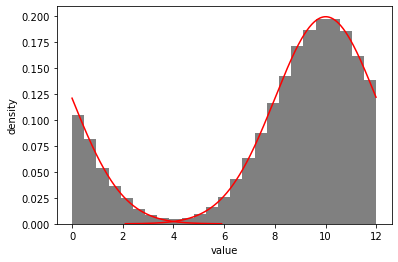

In [2]:
g = distl.gaussian(10, 2, wrap_at=12)
out = g.plot(show=True)

To _temporarily_ disable wrapping, just pass `wrap_at=False` to [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md).

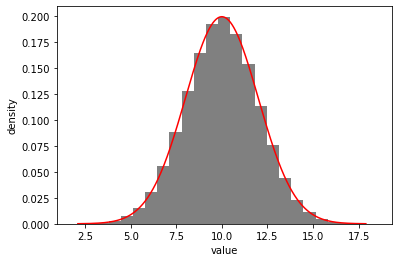

In [3]:
out = g.plot(show=True, wrap_at=False)

To _temporarily_ use a different value for wrapping, pass that value to `wrap` in [sample](../api/Gaussian.sample.md) or [plot](../api/Gaussian.plot.md)

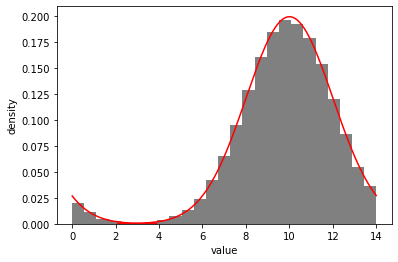

In [4]:
out = g.plot(show=True, wrap_at=14)

If we convert this [Gaussian distribution](../api/Gaussian.md) to a [Histogram](../api/Histogram.md), the wrapping will be maintained.  But note that the underlying distribution bins will be unwrapped, meaning that we can still fit a guassian pre-wrapping.

/home/kyle/.local/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1675: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self._mom_integ1, 0, 1, args=(m,)+args)[0]


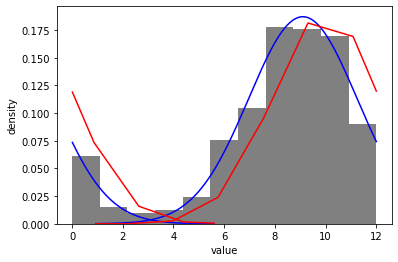

In [5]:
gh = g.to_histogram()
out = gh.plot(show=True, plot_gaussian=True)

# Example 2: Automatic Wrapping for Distributions with Angle Units

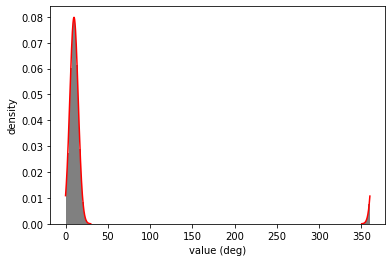

In [6]:
i = distl.gaussian(10, 5)*u.deg
out = i.plot(show=True, bins=200)

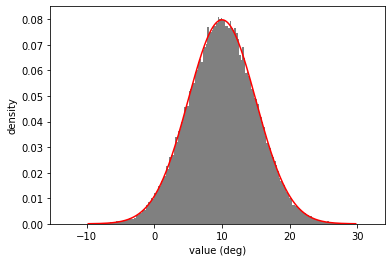

In [7]:
out = i.plot(show=True, wrap_at=False, bins=200)

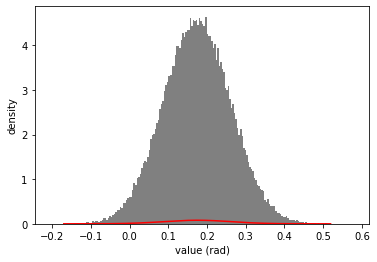

In [8]:
out = i.plot(show=True, bins=200, wrap_at=False, unit=u.rad)
# TODO: need to fix plot_pdf renormalization for changing units

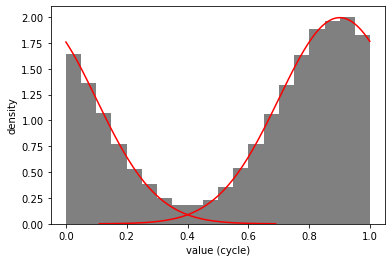

In [10]:
p = distl.gaussian(0.9, 0.2)*u.cycle
out = p.plot(show=True, bins=20)

# Example 3: Uniform Distribution with `low` > `high`

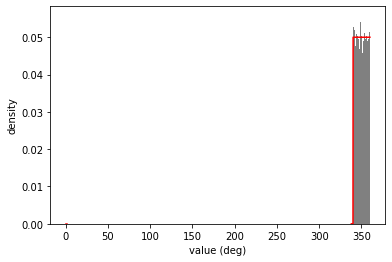

In [11]:
b = distl.uniform(340, 20)*u.deg
out = b.plot(show=True, bins=200)
# TODO: this seems to be broken by the rewrite

Note that passing `wrap_at` to [sample](../api/Uniform.sample.md) or [plot](../api/Uniform.plot.md) will only affect the wrapping _after_ sampling.  To change the "unwrapping" of the `low` and `high` bounds of the boxcar, you must change the attributes themselves.  For example:

In [12]:
print(b.low, b.high)

340.0 20.0


In [13]:
print(b.get_wrap_at())

360


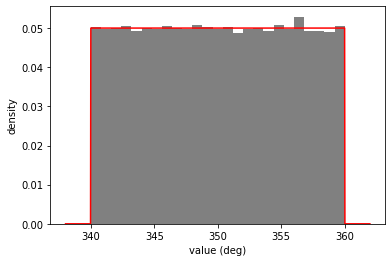

In [14]:
out = b.plot(show=True, wrap_at=False)